# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [12]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress
import json
from pprint import pprint

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 588


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = 'https://api.openweathermap.org/data/2.5/weather?'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    units="metric"
    city_url = f"{url}appid={weather_api_key}&units={units}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response=requests.get(city_url).json()
        

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = response['coord']['lat']
        city_lng = response['coord']['lon']
        city_max_temp = response['main']['temp_max']
        city_humidity = response['main']['humidity']
        city_clouds = response['clouds']['all']
        city_wind = response['wind']['speed']
        city_country = response['sys']['country']
        city_date = response['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | adamstown
Processing Record 2 of Set 1 | la passe
Processing Record 3 of Set 1 | zhaotong
Processing Record 4 of Set 1 | bilibino
Processing Record 5 of Set 1 | sainte-anne-des-monts
Processing Record 6 of Set 1 | pudozh
Processing Record 7 of Set 1 | port-aux-francais
Processing Record 8 of Set 1 | dudinka
Processing Record 9 of Set 1 | puerto ayora
Processing Record 10 of Set 1 | klyuchi
Processing Record 11 of Set 1 | blackmans bay
Processing Record 12 of Set 1 | college
Processing Record 13 of Set 1 | ushuaia
Processing Record 14 of Set 1 | margaret river
Processing Record 15 of Set 1 | tapes
Processing Record 16 of Set 1 | taiohae
City not found. Skipping...
Processing Record 17 of Set 1 | codrington
Processing Record 18 of Set 1 | jiwani
Processing Record 19 of Set 1 | zaragoza
Processing Record 20 of Set 1 | farasan
Processing Record 21 of Set 1 | east london
Processing Record 22 of Set 1 

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          562
Lat           562
Lng           562
Max Temp      562
Humidity      562
Cloudiness    562
Wind Speed    562
Country       562
Date          562
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,adamstown,-25.0660,-130.1015,21.41,56,98,8.65,PN,1683564208
1,la passe,45.5549,-0.8967,20.13,71,100,1.81,FR,1683564021
2,zhaotong,27.3167,103.7167,11.41,92,100,2.69,CN,1683564234
3,bilibino,68.0546,166.4372,-10.29,97,97,1.26,RU,1683564038
4,sainte-anne-des-monts,49.1240,-66.4924,6.93,57,91,6.17,CA,1683564235


In [68]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [6]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,4.13,64,99,9.50,TF,1683511630
1,iskateley,67.6803,53.1512,-6.59,94,37,2.95,RU,1683511631
2,udachny,66.4167,112.4000,-5.86,44,19,3.22,RU,1683511632
3,bredasdorp,-34.5322,20.0403,12.29,92,28,1.93,ZA,1683511632
4,bodo,67.2800,14.4050,7.19,88,100,7.20,NO,1683511633


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

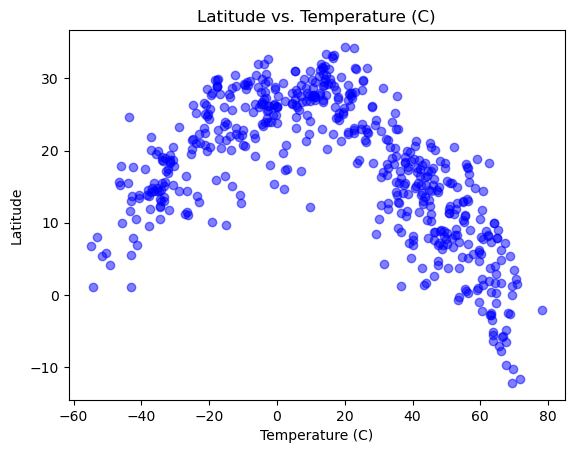

In [8]:
# Build scatter plot for latitude vs. temperature
lat_vs_temp=plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], marker='o', color='b', alpha=.50)

# Incorporate the other graph properties
plt.title('Latitude vs. Temperature (C)')
plt.ylabel('Latitude')
plt.xlabel('Temperature (C)')


# Save the figure
plt.savefig("output_data/lat_vs_temp.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

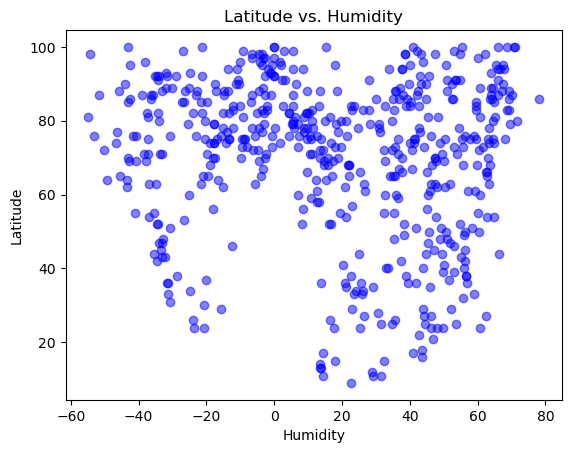

In [9]:
# Build the scatter plots for latitude vs. humidity
lat_vs_hum=plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], marker='o', color='b', alpha=.50)

# Incorporate the other graph properties
plt.title('Latitude vs. Humidity')
plt.ylabel('Latitude')
plt.xlabel('Humidity')

# Save the figure
plt.savefig("output_data/lat_vs_hum.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

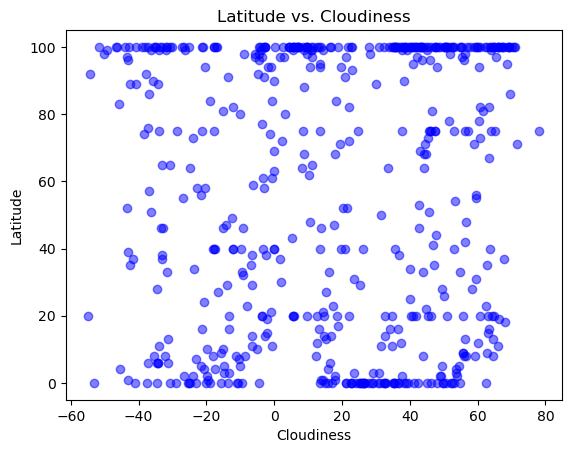

In [10]:
# Build the scatter plots for latitude vs. cloudiness
lat_vs_clouds=plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], marker='o', color='b', alpha=.50)

# Incorporate the other graph properties
plt.title('Latitude vs. Cloudiness')
plt.ylabel('Latitude')
plt.xlabel('Cloudiness')

# Save the figure
plt.savefig("output_data/lat_vs_clouds.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

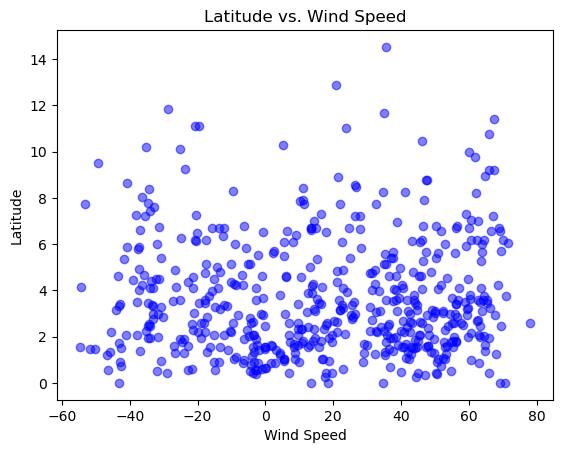

In [11]:
# Build the scatter plots for latitude vs. wind speed
lat_vs_wind=plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], marker='o', color='b', alpha=.50)

# Incorporate the other graph properties
plt.title('Latitude vs. Wind Speed')
plt.ylabel('Latitude')
plt.xlabel('Wind Speed')

# Save the figure
plt.savefig("output_data/lat_vs_wind")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [58]:
# Define a function to create Linear Regression plots

def plot_linear_regression(x, y, x_label, y_label, title):
    slope, intercept, rvalue, pvalue, stderr = st.linregress(x, y)
    regression_line = slope * x + intercept
    
    plt.scatter(x, y)
    plt.plot(x, regression_line, color='red')
    line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
    plt.text(x.min(), y.max(), line_eq, fontsize=14, color='red', ha='left', va='top')
    
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(f"The r-value is: {rvalue**2}")
    
    plt.show()

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df=pd.DataFrame(city_data_df.loc[(city_data_df["Lat"] >= 0)])

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,iskateley,67.6803,53.1512,-6.59,94,37,2.95,RU,1683511631
2,udachny,66.4167,112.4000,-5.86,44,19,3.22,RU,1683511632
4,bodo,67.2800,14.4050,7.19,88,100,7.20,NO,1683511633
8,beyla,8.6833,-8.6333,21.32,78,68,1.02,GN,1683511634
10,yellowknife,62.4560,-114.3525,18.29,27,0,6.17,CA,1683511252


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df=pd.DataFrame(city_data_df.loc[(city_data_df["Lat"] < 0)])

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,4.13,64,99,9.50,TF,1683511630
3,bredasdorp,-34.5322,20.0403,12.29,92,28,1.93,ZA,1683511632
5,fale old settlement,-9.3852,-171.2468,29.14,75,33,4.26,TK,1683511473
6,puerto natales,-51.7236,-72.4875,5.33,87,100,1.45,CL,1683511389
7,nyachera,-0.9000,30.4167,15.39,93,21,0.61,UG,1683511634


###  Temperature vs. Latitude Linear Regression Plot

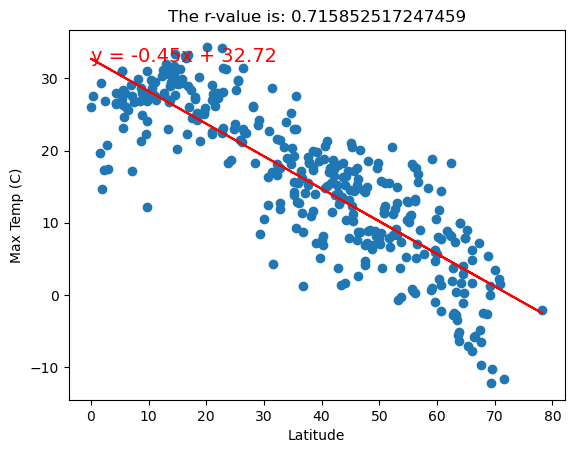

In [59]:
# Linear regression on Northern Hemisphere
x=northern_hemi_df["Lat"]
y=northern_hemi_df["Max Temp"]
plot_linear_regression(x,y, title='Temp (C) vs Lat in Nothern Hemisphere',y_label='Max Temp (C)', x_label='Latitude')

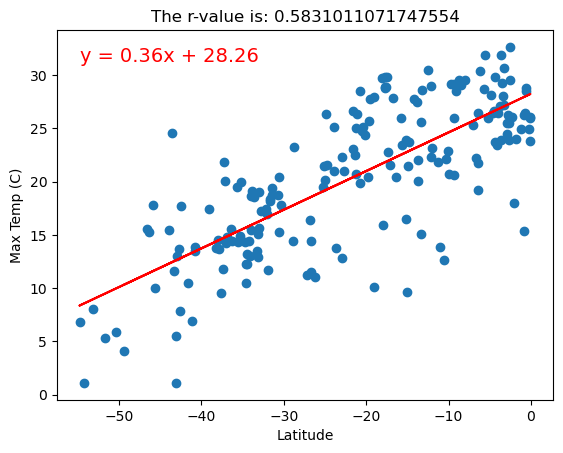

In [61]:
# Linear regression on Southern Hemisphere
x=southern_hemi_df["Lat"]
y=southern_hemi_df["Max Temp"]
plot_linear_regression(x,y, title='Temp (C) vs Lat in Southern Hemisphere',y_label='Max Temp (C)', x_label='Latitude')

**Discussion about the linear relationship:** In the Northern Hemisphere, there is a moderately strong negative linear relationship between latitude and maximum temperature, such that as the latitude value increases, the maximum temperature decreases. This relationship is opposite with respect to the Southern Hemisphere, where there is a moderate positive linear relationship between latitude and maximum temperature. There, as latitude increases, maximum temperature increases, as well.

### Humidity vs. Latitude Linear Regression Plot

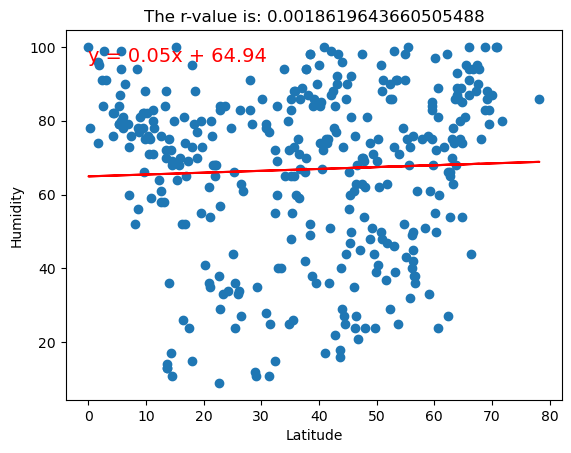

In [62]:
# Northern Hemisphere
x=northern_hemi_df["Lat"]
y=northern_hemi_df["Humidity"]
plot_linear_regression(x,y, title='Humidity vs Lat in Nothern Hemisphere',y_label='Humidity', x_label='Latitude')

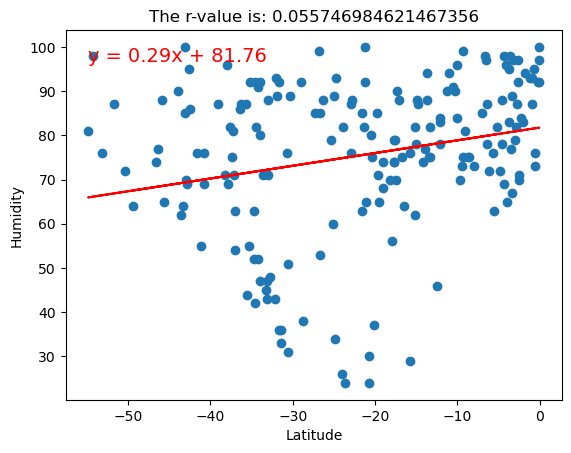

In [63]:
# Southern Hemisphere
x=southern_hemi_df["Lat"]
y=southern_hemi_df["Humidity"]
plot_linear_regression(x,y, title='Humidity vs Lat in Southern Hemisphere',y_label='Humidity', x_label='Latitude')

**Discussion about the linear relationship:** In the Northern Hemisphere, there is basically no relationship between latitude and humidity, as the r-value is very close to 0. In the Southern Hemisphere, there is a slightly larger r-value, but it still shows a very weak positive relationship between humidity and latitude in the Southern Hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

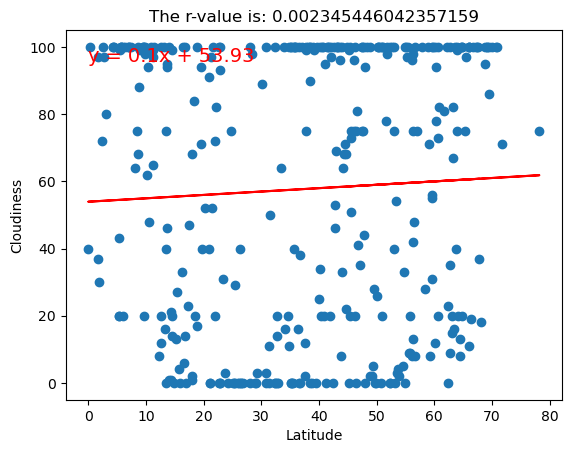

In [64]:
# Northern Hemisphere
x=northern_hemi_df["Lat"]
y=northern_hemi_df["Cloudiness"]
plot_linear_regression(x,y, title='Cloudiness vs Lat in Nothern Hemisphere',y_label='Cloudiness', x_label='Latitude')

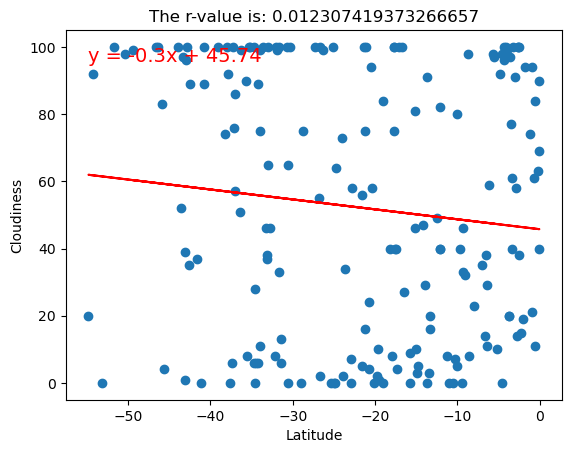

In [65]:
# Southern Hemisphere
x=southern_hemi_df["Lat"]
y=southern_hemi_df["Cloudiness"]
plot_linear_regression(x,y, title='Cloudiness vs Lat in Southern Hemisphere',y_label='Cloudiness', x_label='Latitude')

**Discussion about the linear relationship:** Similar to the previous analysis, there is almost no relationship between cloudiness and latitude in the Northern Hemisphere. The r-value here is also very close to zero. The r-value for the Southern Hemisphere is slightly higher, suggesting more of a relationship between cloudiness and latitude, but it is so small that it is not considered significant.

### Wind Speed vs. Latitude Linear Regression Plot

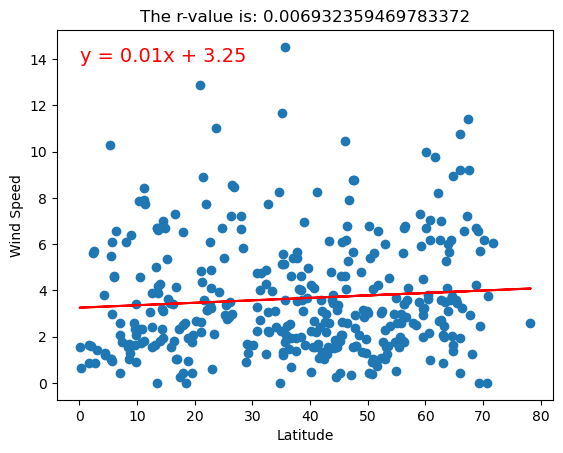

In [66]:
# Northern Hemisphere
x=northern_hemi_df["Lat"]
y=northern_hemi_df["Wind Speed"]
plot_linear_regression(x,y, title='Wind Speed vs Lat in Nothern Hemisphere',y_label='Wind Speed', x_label='Latitude')

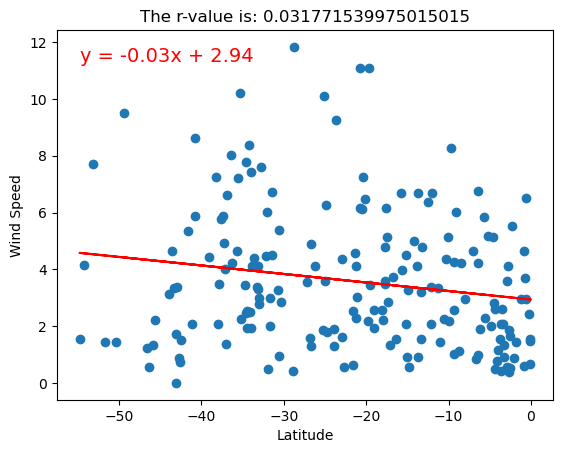

In [67]:
# Southern Hemisphere
x=southern_hemi_df["Lat"]
y=southern_hemi_df["Wind Speed"]
plot_linear_regression(x,y, title='Wind Speed vs Lat in Southern Hemisphere',y_label='Wind Speed', x_label='Latitude')

**Discussion about the linear relationship:** Again, the r-values for both analyses are very low. This shows us that there is no significant relationship between wind speed and latitude in either hemisphere. However, the Southern Hemisphere is showing more of a relationship than the Northern Hemisphere, with a weak negative linear relationship between wind speed and latitude.